<a href="https://colab.research.google.com/github/kumararpan0820/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install imblearn

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import(
    accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc, ConfusionMatrixDisplay,RocCurveDisplay)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Corrected the import statement to use 'imblearn' instead of 'ibmlearn'
from imblearn.over_sampling import SMOTE # Changed 'ibmlearn' to 'imblearn'

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import(
    accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc, ConfusionMatrixDisplay,RocCurveDisplay)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Corrected the import statement to use 'imblearn' instead of 'ibmlearn'
from imblearn.over_sampling import SMOTE
#from PIL import Image
#from worldcloud import WorldCloud
#from nltk.corpus import stopwards

In [21]:
import pandas as pd

#Reading the data
# Adding error handling for unterminated strings
try:
    data = pd.read_csv('/content/logistic_regression.csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # If the error is due to an unterminated string, try reading with 'error_bad_lines=False'
    # This will skip the problematic lines but allow you to read the rest of the data
    data = pd.read_csv('/content/logistic_regression.csv', error_bad_lines=False)
    print("CSV read with error_bad_lines=False, skipping problematic lines.")

data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [22]:
# Shape of the dataset
print("No. of rows :",data.shape[0])
print("No. of columns :",data.shape[1])

No. of rows : 376556
No. of columns : 27


In [23]:
#Checking the distribution of the outcome labels
data.loan_status.value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.396224
Charged Off,19.603776


In [24]:
# Statistical summary of the dataset
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,376556.00000,376556,376556.000000,376556.000000,376556,376556,354771,359163,376556,3.765550e+05,...,376555.000000,376555.000000,3.765550e+05,376287.000000,376555.000000,376555,376555,340561.000000,376048.000000,376555
unique,NaN,2,NaN,NaN,7,35,166010,11,7,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,374439
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USNS Johnson\r\nFPO AE 05113
freq,NaN,287178,NaN,NaN,110339,25316,4161,119788,188597,NaN,...,NaN,NaN,NaN,NaN,NaN,226397,375888,NaN,NaN,8
mean,14115.09231,NaN,13.639180,431.897964,NaN,NaN,NaN,NaN,NaN,7.422022e+04,...,11.310935,0.178311,1.584859e+04,53.793551,25.416367,NaN,NaN,1.815199,0.121772,NaN
std,8359.36672,NaN,4.471761,250.780275,NaN,NaN,NaN,NaN,NaN,6.145337e+04,...,5.139077,0.532618,2.056608e+04,24.458849,11.888685,NaN,NaN,2.149384,0.356295,NaN
min,500.00000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.00000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.022000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.00000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118300e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.00000,NaN,16.490000,567.490000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962600e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376556 entries, 0 to 376555
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             376556 non-null  float64
 1   term                  376556 non-null  object 
 2   int_rate              376556 non-null  float64
 3   installment           376556 non-null  float64
 4   grade                 376556 non-null  object 
 5   sub_grade             376556 non-null  object 
 6   emp_title             354771 non-null  object 
 7   emp_length            359163 non-null  object 
 8   home_ownership        376556 non-null  object 
 9   annual_inc            376555 non-null  float64
 10  verification_status   376555 non-null  object 
 11  issue_d               376555 non-null  object 
 12  loan_status           376555 non-null  object 
 13  purpose               376555 non-null  object 
 14  title                 374890 non-null  object 
 15  

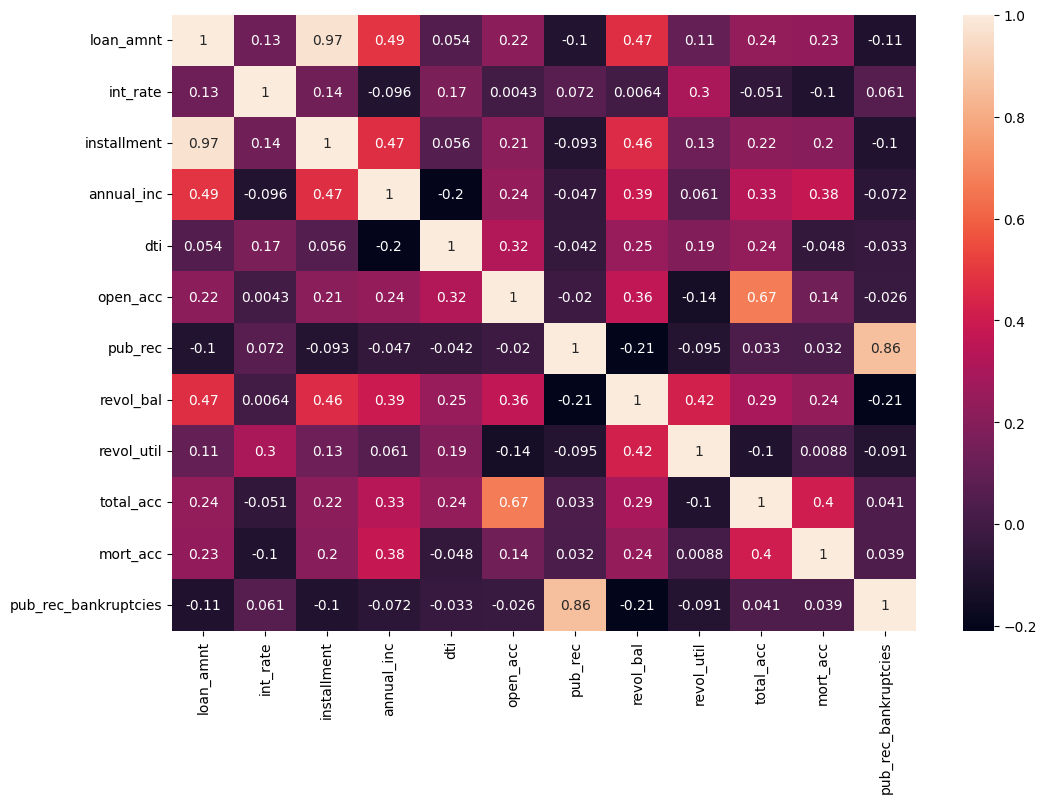

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)
plt.show()

In [28]:
data.drop('installment',axis=1,inplace=True)

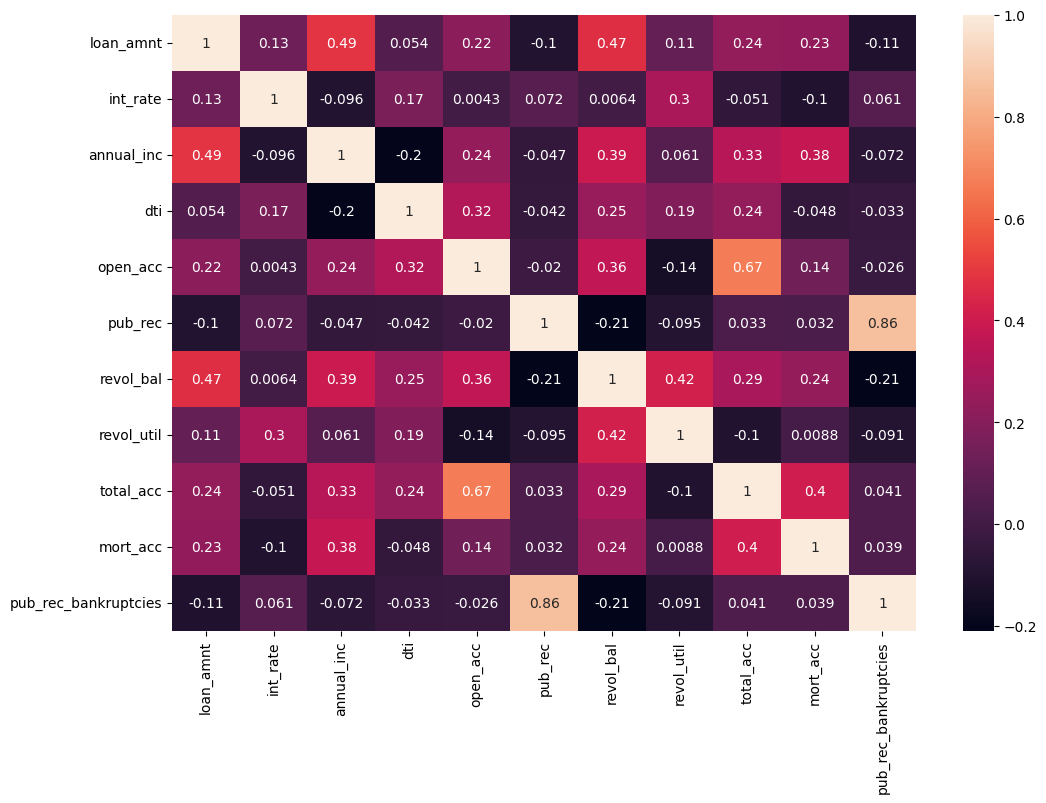

In [31]:
# Remove or comment out the previous drop command (cell 28) where 'installment' was dropped initially:
# data.drop('installment',axis=1,inplace=True)

# Cell 30 should work now if 'installment' is still present in the DataFrame:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True)
plt.show()

In [32]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,73819.0,15126.762419,8509.198974,1000.0,8500.0,14000.0,20000.0,40000.0
Fully Paid,302736.0,13868.429011,8303.772282,500.0,7500.0,12000.0,19225.0,40000.0
